# CPE 490 590
# Homework 04

# Q4 Principal Component Analysis on Diabetes Dataset (20 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd
# load dataset
data = pd.read_csv("../Data/Diabetes/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Assuming that 'data' is your DataFrame and it includes an 'Outcome' column
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data.loc[:, features].values
y = data.loc[:,['Outcome']].values

# Do PCA

In [4]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

## Make Plot


Explained variation per principal component: [0.26179749 0.21640127]


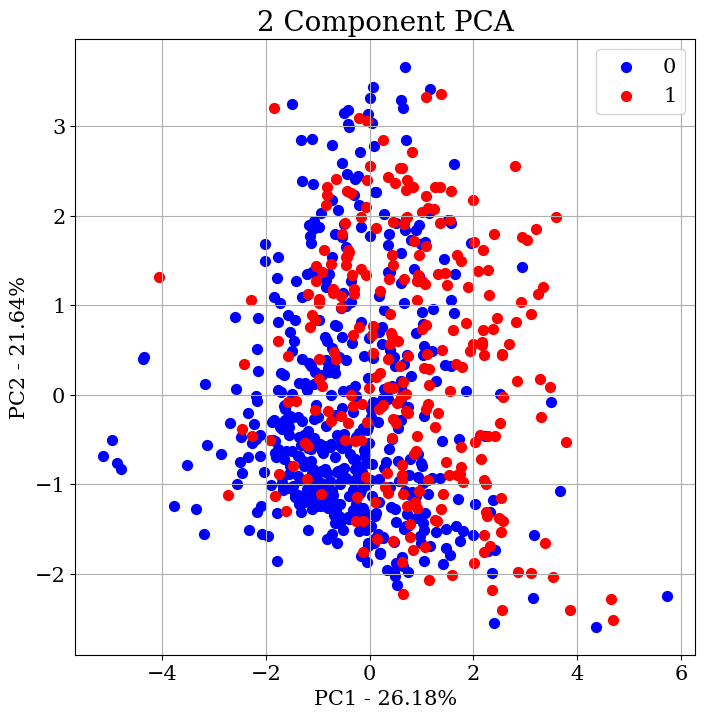

In [7]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Outcome']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.set_xlabel('PC1 - {0}%'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel('PC2 - {0}%'.format(round(pca.explained_variance_ratio_[1]*100, 2)))

ax.grid()

fig.savefig('../figures/hw05_Q2_1_1.pdf', format='pdf', bbox_inches='tight')

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# 3D Plot

In [8]:
# Apply PCA
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(x)

import plotly.express as px
import pandas as pd
# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Outcome'] = y  # Add the labels to the DataFrame

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Outcome')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



# Q5 Flavors of Support Vector Machine (20 points)

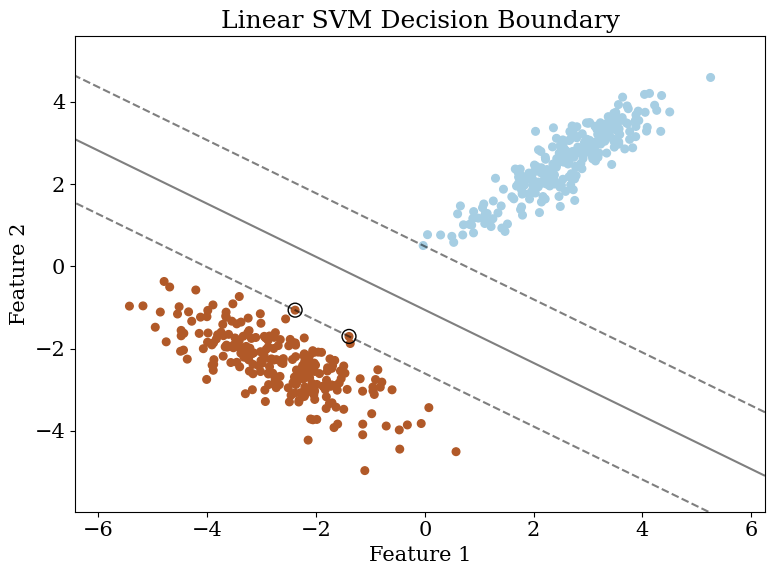

/home/refulgent/anaconda3/envs/CPE490590/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



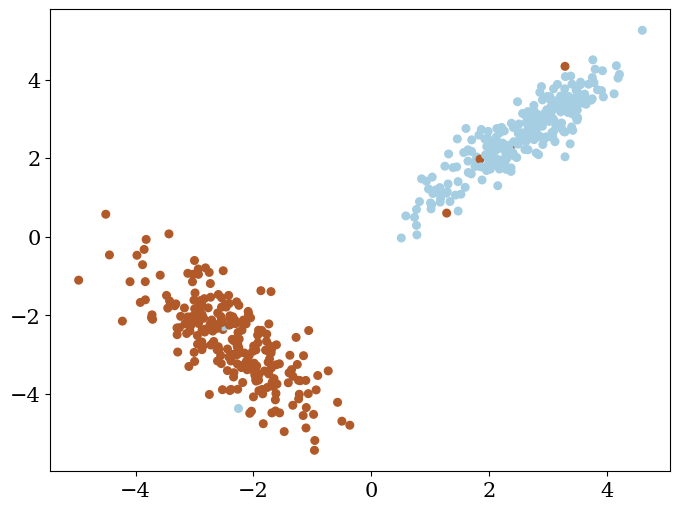

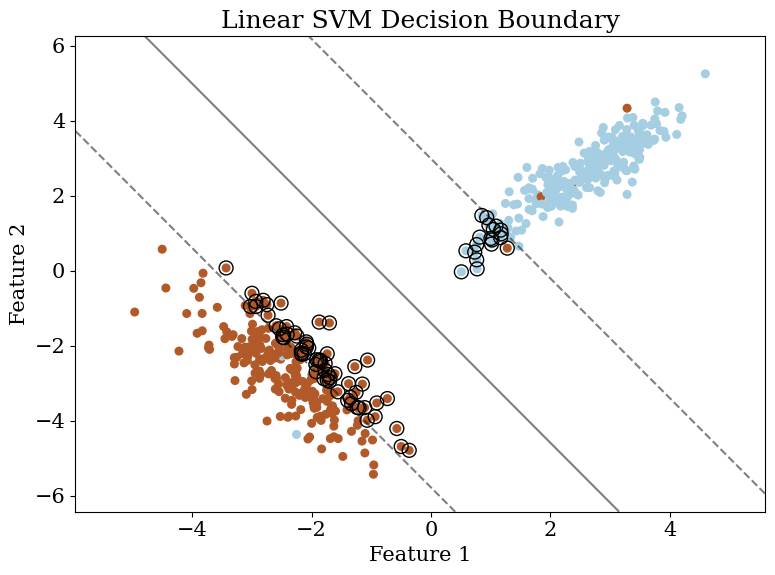

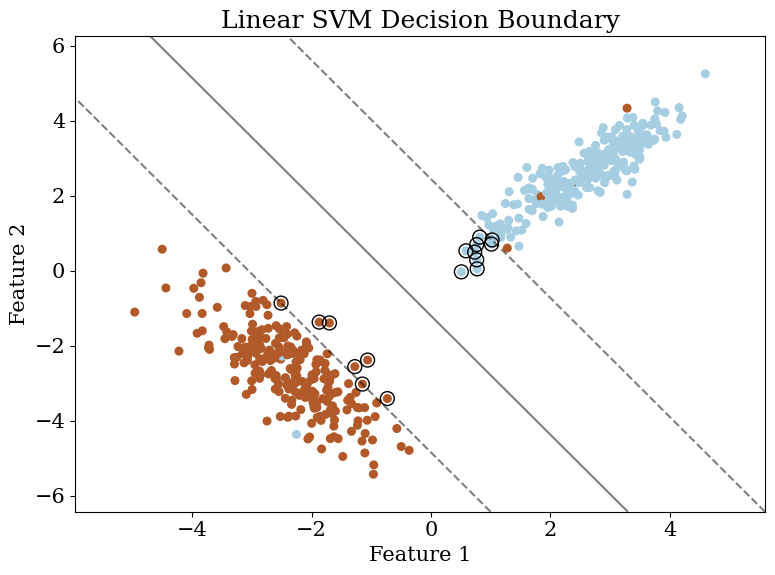

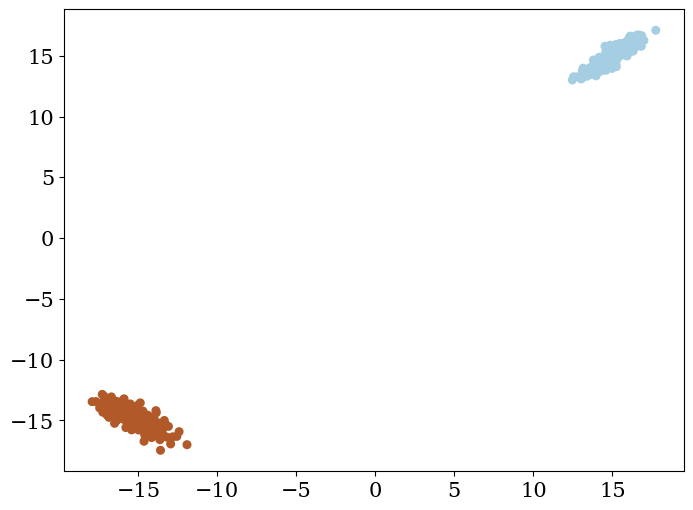

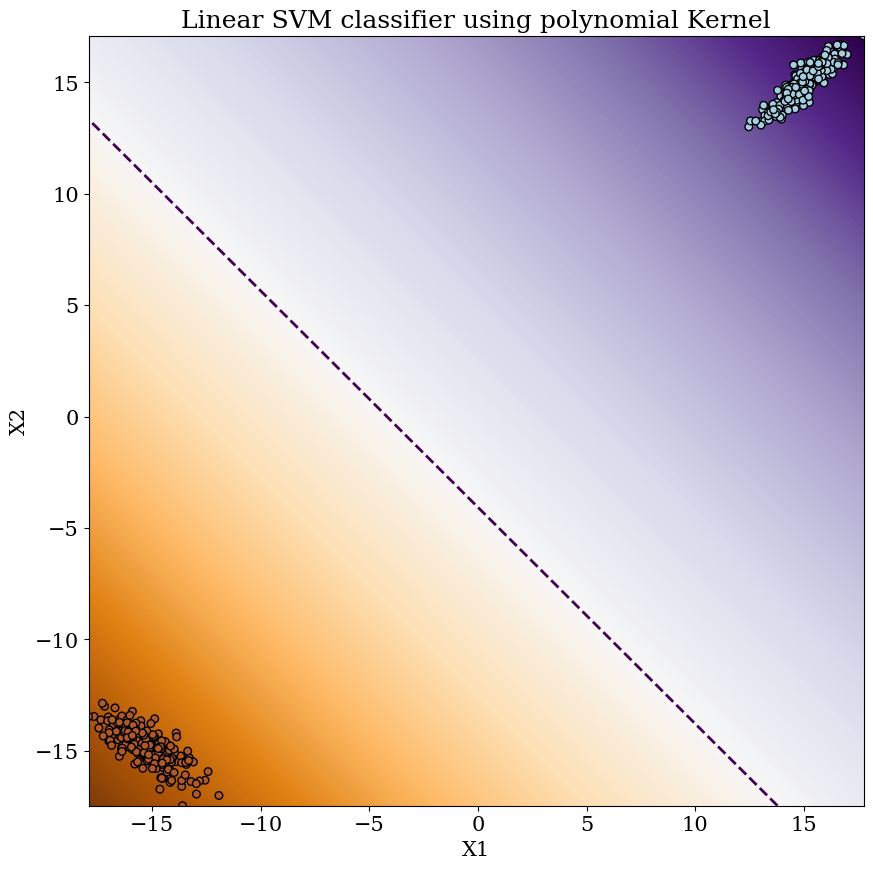

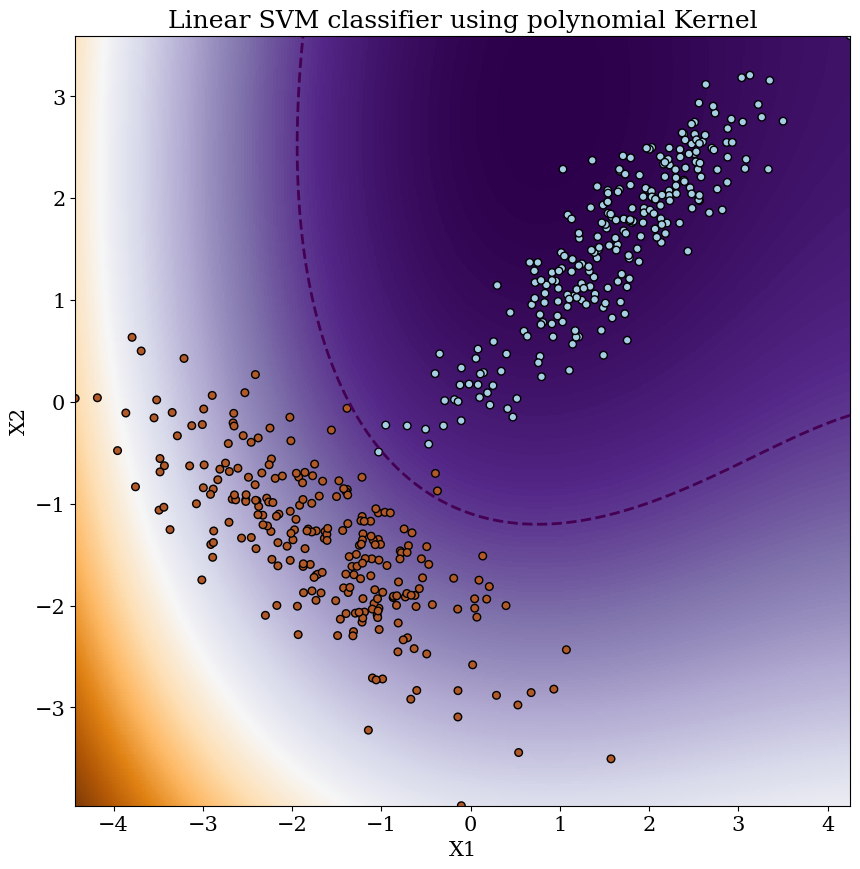

In [12]:
# ## Generation Synethetic Dataset

# %%
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

# Set random seed for reproducibility
seed = 200

# Generate synthetic dataset
X, y = make_classification(n_samples=500, # Number of samples
                            n_features=2, # Number of features
                            n_redundant=0, # Number of redundant features
                            n_informative=2, # Number of informative features
                            n_clusters_per_class=1, # Number of clusters per class
                            n_classes=2, # Number of classes (binary)
                            flip_y=0.00, # Noise level
                            class_sep=2.5, # Factor separating the classes
                            random_state=seed)


# %% [markdown]
# # 1. Train a Linear SVM

# %%

## The large value of C means clearly seaprable case
clf = LinearSVC(C=1e6, loss="hinge", random_state=42, dual="auto").fit(X, y)

# %% [markdown]
# # Obtain the support vectors

# %%
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

# %% [markdown]
# 
# # Plot the data points and decision boundary

# %%
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
    s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


# %% [markdown]
# # 2.Generate dataSet that may need some misclassfication

# %%
# Generate synthetic dataset
X, y = make_classification(n_samples=500, # Number of samples
                            n_features=2, # Number of features
                            n_redundant=0, # Number of redundant features
                            n_informative=2, # Number of informative features
                            n_clusters_per_class=1, # Number of clusters per class
                            n_classes=2, # Number of classes (binary)
                            flip_y=0.02, # Noise level
                            class_sep=2.5, # Factor separating the classes
                            random_state=seed)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)




### By increasing the noise level in the synthetic dataset, 
### we have some data points of one class in the other cluster. 

# %% [markdown]
# # 3.

# %%
## The large value of C means clearly seaprable case
clf = LinearSVC(C=1e6, loss="hinge", random_state=42, dual="auto").fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
    s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


# %% [markdown]
# ### By increasing the noise level in the synthetic dataset, 
### we have some data points of one class in the other cluster. 
### We see that some misclassification happened. 
### Hence, for the noisy data, linear SVM with clear separation didn't work correctly

# %% [markdown]
# # 4. Fuzzy Separation

# %%
## The large value of C means clearly seaprable case
clf = LinearSVC(C=1, loss="hinge", random_state=42, dual="auto").fit(X, y)
decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
        s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


# %% [markdown]
# ### By adding fuzziness, we see that SVM makes 
### less mistakes and the classifier performed better, 
## even with the noisy data.

# %% [markdown]
# # 4. Non linear SVM

# %%
X, y = make_classification(n_samples=500, # Number of samples
                            n_features=2, # Number of features
                            n_redundant=0, # Number of redundant features
                            n_informative=2, # Number of informative features
                            n_clusters_per_class=1, # Number of clusters per class
                            n_classes=2, # Number of classes (binary)
                            flip_y=0.00, # Noise level
                            class_sep=15, # Factor separating the classes
                            random_state=seed)

# %%
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# %%
from sklearn.svm import SVC, NuSVC, LinearSVC


clf_poly = SVC(kernel='poly', degree=3, coef0=1, C=5)
# Fit the classifiers to the data
clf_poly.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                        np.linspace(X[:, 1].min(), X[:, 1].max(), 500))

Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_poly,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title('Linear SVM classifier using polynomial Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



# %% [markdown]
# ## We see a bigger separation between two classes and 
## a polynomial kernel may not be required.
# 

# %% [markdown]
# ## However, my original intention was to have `class_sep = 1.5`. 
### I made a typo there. See below on what was my original intention

# %%
X, y = make_classification(n_samples=500, # Number of samples
                            n_features=2, # Number of features
                            n_redundant=0, # Number of redundant features
                            n_informative=2, # Number of informative features
                            n_clusters_per_class=1, # Number of clusters per class
                            n_classes=2, # Number of classes (binary)
                            flip_y=0.00, # Noise level
                            class_sep=1.5, # Factor separating the classes
                            random_state=seed)

from sklearn.svm import SVC, NuSVC, LinearSVC


clf_poly = SVC(kernel='poly', degree=3, coef0=1, C=5)
# Fit the classifiers to the data
clf_poly.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                        np.linspace(X[:, 1].min(), X[:, 1].max(), 500))

Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_poly,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title('Linear SVM classifier using polynomial Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
